In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import copy
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
adata = scv.datasets.pancreas('/Users/evanli/Documents/Research_datasets/endocrinogenesis_day15.h5ad')
adata.shape

(3696, 27998)

In [3]:
# briefly view adata.X
nonzero_indices = adata.X[0].nonzero()[1]  # column index of nonzero values
nonzero_values = adata.X[0, nonzero_indices].toarray()[:, :20]
print(nonzero_values.tolist())

[[2.0, 2.0, 14.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 13.0]]


In [4]:
### Normalization
# sc.pp.normalize_total(adata, target_sum=None)
# sc.pp.log1p(adata)

In [4]:
adata.obs.head()

,clusters_coarse,clusters,S_score,G2M_score
index,,,,
AAACCTGAGAGGGATA,Pre-endocrine,Pre-endocrine,-0.224902,-0.252071
AAACCTGAGCCTTGAT,Ductal,Ductal,-0.014707,-0.232610
AAACCTGAGGCAATTA,Endocrine,Alpha,-0.171255,-0.286834
AAACCTGCATCATCCC,Ductal,Ductal,0.599244,0.191243
AAACCTGGTAAGTGGC,Ngn3 high EP,Ngn3 high EP,-0.179981,-0.126030


In [5]:
# convert raw counts to binary matrix
X_binary = (adata.X > 0).astype(int)
type(X_binary)

scipy.sparse.csr.csr_matrix

## UMAP 

In [9]:
sc.tl.pca(adata, svd_solver='arpack')

In [10]:
# sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, metric='euclidean')
# sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, metric='jaccard')
sc.pp.neighbors(adata, n_neighbors=15, metric='jaccard')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [11]:
adata.obsp

PairwiseArrays with keys: distances, connectivities

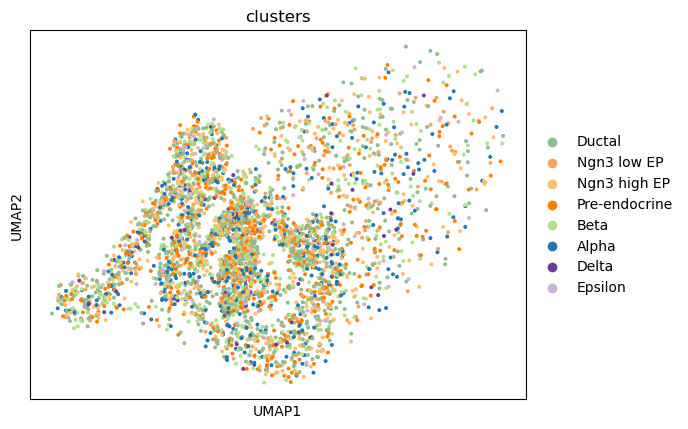

In [12]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='clusters')

## UMAP Jaccard (binary adata.X)

In [6]:
type(X_binary)

scipy.sparse.csr.csr_matrix

In [7]:
adata_binary = copy.deepcopy(adata)
adata_binary.X = X_binary

In [8]:
sc.pp.neighbors(adata_binary, n_neighbors=15, metric='jaccard')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
adata_binary.obsp

PairwiseArrays with keys: distances, connectivities

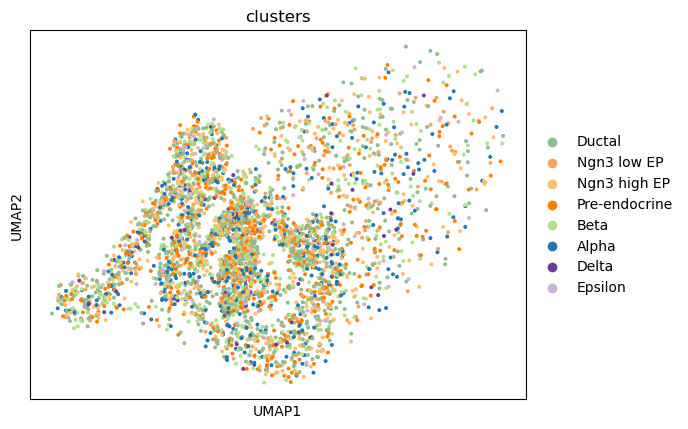

In [10]:
sc.tl.umap(adata_binary)
sc.pl.umap(adata_binary, color='clusters')